# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import csv
import time
import openweathermapy.core as owm

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries =[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        

city_data = pd.DataFrame({"City": cities, "Country": countries})
city_data.head()

city_data["Cloudiness"] = ""
city_data["Date"] = ""
city_data["Humidity"] = ""
city_data["Lat"] = ""
city_data["Lng"] = ""
city_data["Max Temp"] = ""
city_data["Wind Speed"] = ""

city_data.head()

# Print the city count to confirm sufficient count
len(city_data)


619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Openweather URL and API key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
api_key = "7877738b651f6172dfb2597fe3669dab"
row_count = 0

#loop through city row to perform API calls
print("*************************")
print("BEGINNING DATA RETRIEVAL")
print("*************************")
for index, row in city_data.iterrows():
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + (row['City'])
    response = requests.get(query_url).json()
    print("-------------------------------")
    print(f"Processing City#: {row_count + 1} | {row['City']}")
    print(f"This is the requested URL: {query_url}")
    row_count += 1
    
    try:
        city_data.set_value(index, "Cloudiness", response["clouds"]["all"])
        city_data.set_value(index, "Date", response["dt"])
        city_data.set_value(index, "Humidity", response["main"]["humidity"])
        city_data.set_value(index, "Lat", response["coord"]["lat"])
        city_data.set_value(index, "Lng", response["coord"]["lon"])
        city_data.set_value(index, "Max Temp", response["main"]["temp_max"])
        city_data.set_value(index, "Wind Speed", response["wind"]["speed"])
    except:
        print("City not found. Skipping...")
     
    
    if row_count % 55 == 0:
        print("********************")
        print("PAUSE FOR 60 SECONDS")
        print("********************")
        time.sleep(60)
    
print("*************************")
print("DATA RETRIEVAL COMPLETE")
print("*************************")

*************************
BEGINNING DATA RETRIEVAL
*************************
-------------------------------
Processing City#: 1 | venado tuerto
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=venado tuerto
-------------------------------
Processing City#: 2 | martapura
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=martapura


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_l

-------------------------------
Processing City#: 3 | jamestown
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=jamestown
-------------------------------
Processing City#: 4 | barrow
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=barrow
-------------------------------
Processing City#: 5 | rikitea
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=rikitea
-------------------------------
Processing City#: 6 | tura
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=tura
-------------------------------
Processing City#: 7 | butaritari
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=butaritar

-------------------------------
Processing City#: 44 | vestmannaeyjar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=vestmannaeyjar
-------------------------------
Processing City#: 45 | flinders
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=flinders
-------------------------------
Processing City#: 46 | souillac
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=souillac
-------------------------------
Processing City#: 47 | ribeira grande
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=ribeira grande
-------------------------------
Processing City#: 48 | phalaborwa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172df

-------------------------------
Processing City#: 85 | kavaratti
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=kavaratti
-------------------------------
Processing City#: 86 | port lincoln
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=port lincoln
-------------------------------
Processing City#: 87 | torring
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=torring
-------------------------------
Processing City#: 88 | pevek
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=pevek
-------------------------------
Processing City#: 89 | vaini
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperi

-------------------------------
Processing City#: 127 | santa isabel do rio negro
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=santa isabel do rio negro
-------------------------------
Processing City#: 128 | bambous virieux
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=bambous virieux
-------------------------------
Processing City#: 129 | yaan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=yaan
-------------------------------
Processing City#: 130 | taolanaro
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=taolanaro
City not found. Skipping...
-------------------------------
Processing City#: 131 | port ellen
This is the requested URL: http://api.openweath

-------------------------------
Processing City#: 168 | belushya guba
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=belushya guba
City not found. Skipping...
-------------------------------
Processing City#: 169 | dikson
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=dikson
-------------------------------
Processing City#: 170 | arona
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=arona
-------------------------------
Processing City#: 171 | hay river
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=hay river
-------------------------------
Processing City#: 172 | nsoko
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f

-------------------------------
Processing City#: 207 | praya
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=praya
-------------------------------
Processing City#: 208 | faanui
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=faanui
-------------------------------
Processing City#: 209 | caravelas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=caravelas
-------------------------------
Processing City#: 210 | voyinka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=voyinka
-------------------------------
Processing City#: 211 | pochutla
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q

-------------------------------
Processing City#: 247 | muvattupula
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=muvattupula
-------------------------------
Processing City#: 248 | lillooet
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=lillooet
-------------------------------
Processing City#: 249 | warsaw
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=warsaw
-------------------------------
Processing City#: 250 | airai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=airai
-------------------------------
Processing City#: 251 | severo-kurilsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&unit

-------------------------------
Processing City#: 287 | vila
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=vila
-------------------------------
Processing City#: 288 | louisbourg
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=louisbourg
City not found. Skipping...
-------------------------------
Processing City#: 289 | santa marta
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=santa marta
-------------------------------
Processing City#: 290 | coihaique
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=coihaique
-------------------------------
Processing City#: 291 | sur
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f

-------------------------------
Processing City#: 327 | camacha
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=camacha
-------------------------------
Processing City#: 328 | borba
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=borba
-------------------------------
Processing City#: 329 | mount isa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=mount isa
-------------------------------
Processing City#: 330 | kiama
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=kiama
********************
PAUSE FOR 60 SECONDS
********************
-------------------------------
Processing City#: 331 | kiunga
This is the requested URL: http://api.openweathermap.org/data/2.5/weat

-------------------------------
Processing City#: 367 | corumba
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=corumba
-------------------------------
Processing City#: 368 | mikhaylovka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=mikhaylovka
-------------------------------
Processing City#: 369 | mangrol
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=mangrol
-------------------------------
Processing City#: 370 | cap malheureux
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=cap malheureux
-------------------------------
Processing City#: 371 | comodoro rivadavia
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f617

-------------------------------
Processing City#: 408 | aykino
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=aykino
-------------------------------
Processing City#: 409 | pemangkat
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=pemangkat
City not found. Skipping...
-------------------------------
Processing City#: 410 | palabuhanratu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=palabuhanratu
City not found. Skipping...
-------------------------------
Processing City#: 411 | kodiak
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=kodiak
-------------------------------
Processing City#: 412 | mogadishu
This is the requested URL: http://api.openweathermap.org/d

-------------------------------
Processing City#: 448 | port blair
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=port blair
-------------------------------
Processing City#: 449 | la ronge
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=la ronge
-------------------------------
Processing City#: 450 | khilok
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=khilok
-------------------------------
Processing City#: 451 | ziniare
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=ziniare
-------------------------------
Processing City#: 452 | annonay
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imp

-------------------------------
Processing City#: 489 | miri
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=miri
-------------------------------
Processing City#: 490 | yellandu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=yellandu
-------------------------------
Processing City#: 491 | ucluelet
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=ucluelet
-------------------------------
Processing City#: 492 | norman wells
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=norman wells
-------------------------------
Processing City#: 493 | nouadhibou
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&unit

-------------------------------
Processing City#: 529 | cumaribo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=cumaribo
City not found. Skipping...
-------------------------------
Processing City#: 530 | chapais
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=chapais
-------------------------------
Processing City#: 531 | mount darwin
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=mount darwin
-------------------------------
Processing City#: 532 | toliary
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=toliary
City not found. Skipping...
-------------------------------
Processing City#: 533 | the valley
This is the requested URL: http://api.openweathermap.org/

-------------------------------
Processing City#: 569 | byron bay
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=byron bay
-------------------------------
Processing City#: 570 | guozhen
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=guozhen
-------------------------------
Processing City#: 571 | namibe
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=namibe
-------------------------------
Processing City#: 572 | kamaishi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=kamaishi
-------------------------------
Processing City#: 573 | turbat
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperi

-------------------------------
Processing City#: 609 | omsukchan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=omsukchan
-------------------------------
Processing City#: 610 | alta floresta
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=alta floresta
-------------------------------
Processing City#: 611 | pacasmayo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=pacasmayo
-------------------------------
Processing City#: 612 | tamandare
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe3669dab&units=Imperial&q=tamandare
-------------------------------
Processing City#: 613 | suntar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7877738b651f6172dfb2597fe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data.head(15)

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,venado tuerto,ar,0,1536187856,47,-33.75,-61.97,67.37,15.82
1,martapura,id,8,1536187856,99,-3.41,114.85,77.9,4.18
2,jamestown,sh,68,1536187856,74,-33.21,138.6,51.8,11.34
3,barrow,us,20,1536187683,48,-38.31,-60.23,68.09,17.49
4,rikitea,pf,48,1536187857,100,-23.12,-134.97,72.14,27.78
5,tura,ru,92,1536187857,95,25.52,90.21,77.27,2.95
6,butaritari,ki,64,1536187857,100,3.07,172.79,84.65,11.79
7,bengkulu,id,,,,,,,
8,albany,au,20,1536184440,54,42.65,-73.75,89.96,12.75
9,de-kastri,ru,0,1536187915,89,51.48,140.77,60.71,18.05


In [9]:
#delete empty rows
city_data = city_data.replace(r'', np.NaN)
city_data = city_data.dropna(how='any')
city_data.count()

City          554
Country       554
Cloudiness    554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [10]:
#export city data into CSV
city_data.to_csv("city_data.csv", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

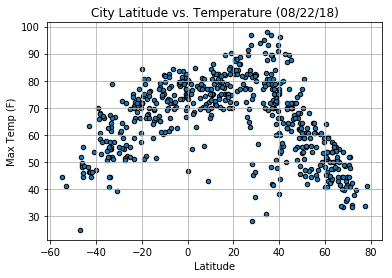

In [28]:
#create a plot
city_data.plot.scatter(["Lat"], ["Max Temp"], marker ='o', facecolors ="blue", edgecolors="black", alpha = 1)

#Set the labels
plt.title("City Latitude vs. Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

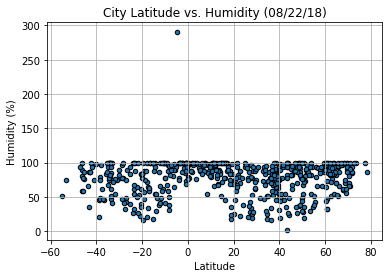

In [29]:
#create a plot
city_data.plot.scatter(["Lat"], ["Humidity"], marker ='o', facecolors ="blue", edgecolors="black", alpha = 1)

#Set the labels
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

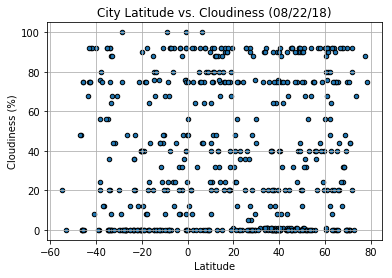

In [30]:
#create a plot
city_data.plot.scatter(["Lat"], ["Cloudiness"], marker ='o', facecolors ="blue", edgecolors="black", alpha = 1)

#Set the labels
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

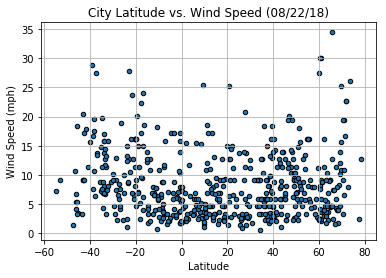

In [31]:
#create a plot
city_data.plot.scatter(["Lat"], ["Wind Speed"], marker ='o', facecolors ="blue", edgecolors="black", alpha = 1)

#Set the labels
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()